# HW 01

In [1]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

### PCA plotting function

In [2]:
def plot_PCA(df, name, classes):
    x = df.drop(columns=['label'])
    y = df['label']

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                  , columns = ['principal component 1', 'principal component 2'])

    finalDf = pd.concat([principalDf, df[['label']]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(f'{name} dataset PCA', fontsize = 20)
    targets = classes
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

## Leave-one-out cross validation
$LOO(k, D) = {{\sum_{x_{i}\in D}{[h(x_i;D\setminus x_i; k) \ne y_i]}}\over {|D|}}$

## 1. kNN

In [3]:
def kNN(X, Y, unknown, k_list, default=False):
    """Returns list of classes determined by k neighbours"""
    def get_dist(a, b):
        """Euclidean distance"""
        return np.linalg.norm(a - b)
    
    def get_neighbours(X, unknown):
        """Returns pd.series with 10 neighbours for unknown sample"""
        return X.apply(lambda row: get_dist(row, unknown), axis=1).sort_values(ascending=True)[1:11]
    
    neib_indexes = get_neighbours(X, unknown).index
    classes_list = []
    for k in k_list:
        neib_classes = Y[neib_indexes[:k]].value_counts() # pd series [{class: number of neighbours}]
        num_of_equal = neib_classes.value_counts()[neib_classes.iloc[0]] 
    
        if num_of_equal > 1:
            if default and default in neib_classes.index[0:num_of_equal]:
                classes_list.append(default)
            else:
                classes_list.append(random.choice(neib_classes.index[0:num_of_equal]))
        else:
            classes_list.append(neib_classes.index[0])
    return classes_list


## Leave-one-out cross validation
$LOO(k, D) = {{\sum_{x_{i}\in D}{[h(x_i;D\setminus x_i; k) \ne y_i]}}\over {|D|}}$

In [10]:
def LOO(k_list, df, default=False):
    X = df.drop(columns=['label']) #input
    Y = df['label'] # output
    cnt = np.zeros(len(k_list))
    for i in df.index:
        unknown = X.iloc[i]
        kNN_list = kNN(X, Y, unknown, k_list, default)
        for j in range(len(k_list)):
            if kNN_list[j] != Y[i]:
                cnt[j] += 1
    #cnt = sum(X.apply(lambda row: 1 if kNN(X, Y, row, k) != Y[i] else 0, axis=1))
    return cnt/df.shape[0]

## 1.1 Cancer dataset

In [6]:
df = pd.read_csv('cancer.csv')
df.head()


label      1      2       3       4        5        6       7        8  \
0     M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710   
1     M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017   
2     M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790   
3     M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520   
4     M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430   

        9   ...        21     22      23      24      25      26      27  \
0  0.2419   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.1812   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.2069   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.2597   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.1809   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       28      29       30  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 31 columns]

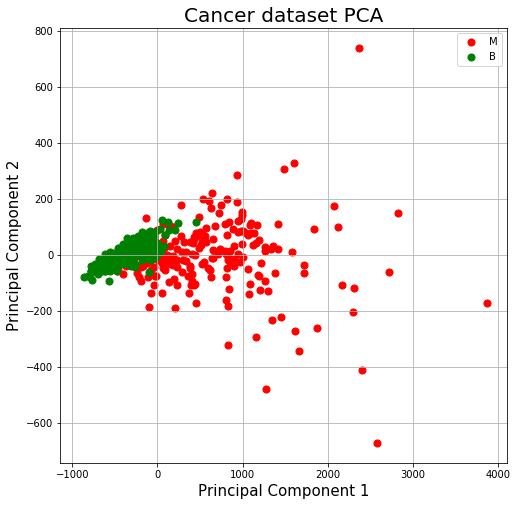

In [7]:
plot_PCA(df, "Cancer", ['M', 'B'])

In [11]:
k_ar = np.array(range(1,11))
LOO_vals = np.zeros(10)
LOO_vals = LOO(k_ar, df, default='M')
LOO_vals

array([0.08435852, 0.0913884 , 0.07381371, 0.07205624, 0.06678383,
       0.0685413 , 0.0685413 , 0.06502636, 0.06678383, 0.06326889])

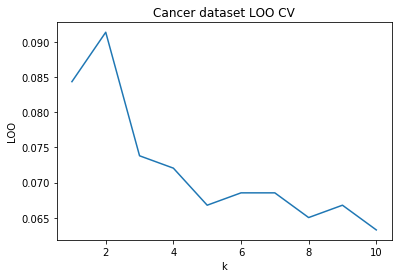

In [12]:
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('Cancer dataset LOO CV')
plt.plot(k_ar, LOO_vals)
plt.show()

## 1.2 Spam dataset

In [15]:
df = pd.read_csv('spam.csv')
df.head()
df.shape

(4601, 58)

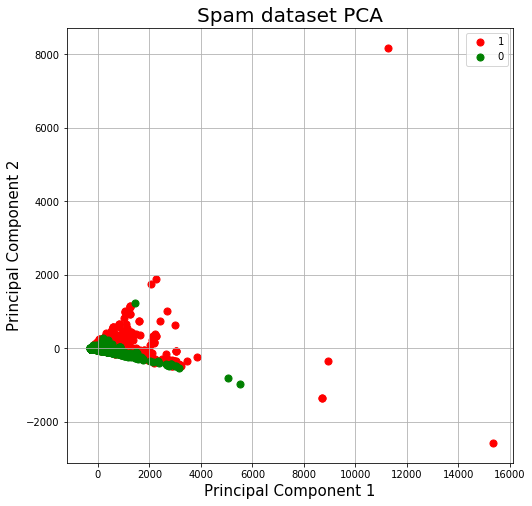

In [16]:
plot_PCA(df, "Spam", [1, 0])

In [17]:
k_ar = np.array(range(1,11))
LOO_vals = LOO(k_ar, df, default=0)
LOO_vals

array([0.16865899, 0.19756575, 0.1845251 , 0.19126277, 0.18539448,
       0.19886981, 0.19582699, 0.1973484 , 0.20256466, 0.19908715])

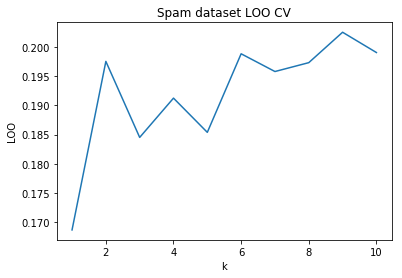

In [18]:
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('Spam dataset LOO CV')
plt.plot(k_ar, LOO_vals)
plt.show()